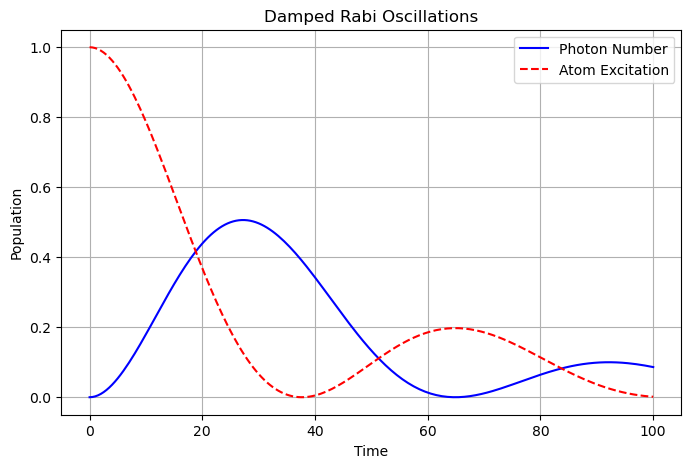

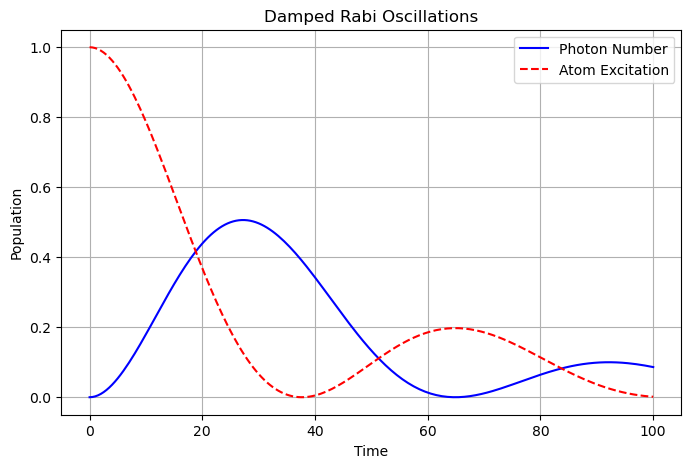

In [1]:
using QuantumOptics
using PyPlot

# Parameters
N = 15
ω = 1.0
g = 0.05
κ = 0.05  # Decay rate (Cavity leak)

# Build System
b_cav = FockBasis(N)
b_atom = SpinBasis(1//2)

a = destroy(b_cav) ⊗ one(b_atom)
sm = one(b_cav) ⊗ sigmam(b_atom)
sz = one(b_cav) ⊗ sigmaz(b_atom)

H = ω*a'*a + 0.5*ω*sz + g*(a'*sm + a*sm')

# Dissipation
# Create a list of Jump Operators
# The cavity loses photons at rate κ
J = [sqrt(κ) * a]

# Time Evolution
psi0 = fockstate(b_cav, 0) ⊗ spinup(b_atom)
T = [0:0.5:100;]

tout, rho_t = timeevolution.master(T, psi0, H, J)

# Plotting
n_vals = real(expect(a'*a, rho_t))
P_exc = real(expect((sz + one(sz))/2, rho_t))

figure(figsize=(8, 5))
plot(tout, n_vals, label="Photon Number", color="blue")
plot(tout, P_exc, label="Atom Excitation", color="red", linestyle="--")

xlabel("Time")
ylabel("Population")
title("Damped Rabi Oscillations")
legend()
grid(true)
display(gcf())